In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
pd.set_option('display.max_columns', 10)  # or 1000
pd.set_option('display.max_rows', 10)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199
pd.options.mode.chained_assignment = None  # default='warn'

In [4]:
# Saving chart with white background
plt.rcParams['savefig.facecolor'] = 'white'

In [5]:
analyst_data = pd.read_excel('input/LinkedIn-Job-Data-Analyst-Sep-13-2022_1923.xlsx')
engineer_data = pd.read_excel('input/LinkedIn-Job-Data-Engineer-Sep-13-2022_1808.xlsx')
scientist_data = pd.read_excel('input/LinkedIn-Job-Data-Scientist-Sep-13-2022_1728.xlsx')

# 1. Summary Data

In [6]:
analyst_data.head()

Company        Date                    Title  \
0                                Hismile  2022-09-13      Junior Data Analyst   
1  Resonance Technology Services Pty LTD  2022-09-13             Data Analyst   
2                                Datacom  2022-08-18  Graduate - Data Analyst   
3                                   Sika  2022-08-23      Junior Data Analyst   
4                    Omnicom Media Group  2022-09-09      Junior Data Analyst   

                             Location  \
0   Gold Coast, Queensland, Australia   
1  Sydney, New South Wales, Australia   
2  Sydney, New South Wales, Australia   
3  Sydney, New South Wales, Australia   
4  Sydney, New South Wales, Australia   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [7]:
analyst_data.describe()

,Company,Date,Title,Location,Description,Type,Link
count,491,491,491,491,491,491,491
unique,264,57,231,71,358,283,491
top,Agoda,2022-09-12,Data Analyst,"Sydney, New South Wales, Australia",None,"Seniority level\nNot Applicable\nEmployment type\nFull-time\nJob function\nInformation Technology\nIndustries\nFinancial Services, Business Consulting and Services, and Accounting",https://au.linkedin.com/jobs/view/junior-data-analyst-at-hismile-3260036794?refId=XbXfkkck%2Fb6mw5O5dbWijw%3D%3D&trackingId=Hv8%2F6dNqK7eKim71t9SLjA%3D%3D&position=1&pageNum=0&trk=public_jobs_jserp-result_search-card
freq,33,47,105,169,59,19,1


# 2. Data Exploration

## 2.1 Data Filtering

In [8]:
analyst_data_clean = analyst_data.copy()

In [9]:
analyst_data_clean = analyst_data_clean.drop(['Date', 'Link'], axis='columns')

In [10]:
analyst_data_clean = analyst_data_clean.drop(analyst_data_clean[analyst_data_clean.Description=='None'].index)\
                                        .reset_index(drop=True)
# analyst_data_clean

In [11]:
analyst_data_clean = analyst_data_clean.iloc[analyst_data_clean[['Company', 'Title', 'Description']]
                                                .drop_duplicates().index].reset_index(drop=True)
# analyst_data_clean

In [12]:
analyst_data_clean = analyst_data_clean[analyst_data_clean['Title'].str.contains('Data Analyst', regex=True)]\
                                                                    .reset_index(drop=True)
# analyst_data_clean

## 2.2 Split Texts

### 2.2.1 Split Type Metric

In [13]:
analyst_type = analyst_data_clean.Type.str.replace("\n", ";").str.split(";", 7 , expand=True)
# analyst_type

In [14]:
analyst_data_clean = analyst_data_clean[analyst_type[7].notnull()].reset_index(drop=True)

In [15]:
# Keep rows with no null
analyst_type = analyst_type[analyst_type[7].notna()].reset_index(drop=True)
# analyst_type

In [16]:
analyst_columns_name = analyst_type.iloc[0][[0,2,4,6]].values
# analyst_columns_name

In [17]:
analyst_type = analyst_type.drop(analyst_type.columns[[0,2,4,6]], axis='columns')

In [18]:
analyst_type.columns = analyst_columns_name
# analyst_type

In [19]:
analyst_data_clean = pd.concat([analyst_data_clean, analyst_type], axis='columns')
# analyst_data_clean

In [20]:
analyst_data_clean = analyst_data_clean.drop('Type', axis='columns')

### 2.2.2 Split location

In [21]:
analyst_data_clean.columns.get_loc('Location')

2

In [22]:
def split_location(df):
    df_temp = df["Location"].str.split(',', expand=True)
    df_temp.columns=['City', 'State', 'Country']
    df = pd.concat([df.loc[:, :"Location"], df_temp, df.loc[:, "Description":]], axis='columns')
    df = df.drop(columns='Location')
    return df

In [23]:
analyst_data_clean = split_location(analyst_data_clean)
# analyst_data_clean

In [24]:
analyst_data_clean.columns

Index(['Company', 'Title', 'City', 'State', 'Country', 'Description',
       'Seniority level', 'Employment type', 'Job function', 'Industries'],
      dtype='object')

## 2.3 Text Cleaning for NLP

In [25]:
analyst_description = analyst_data_clean.Description.str.replace("\n", ' ').to_frame()
analyst_description

Description
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [26]:
# analyst_description.Description.str.split(expand=True).stack().value_counts()

In [27]:
import re

# Normalization
def clean_text(df, text_field, new_text_field_name):
    df[new_text_field_name] = df[text_field].str.lower()
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    # remove numbers
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
    
    return df

analyst_description = clean_text(analyst_description, 'Description', 'Description_clean')
# analyst_description

In [28]:
# Stop words
import nltk.corpus
nltk.download('stopwords')

from nltk.corpus import stopwords
stop = stopwords.words('english')

analyst_description['Description_clean'] = analyst_description['Description_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

# analyst_description

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Austin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
import nltk 
nltk.download('punkt')

from nltk.tokenize import sent_tokenize, word_tokenize
analyst_description['Description_tokens'] = analyst_description['Description_clean'].apply(lambda x: word_tokenize(x))
# analyst_description.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Austin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
# Stemming
# from nltk.stem import PorterStemmer 
# from nltk.tokenize import word_tokenize

# def word_stemmer(text):
#     stem_text = [PorterStemmer().stem(i) for i in text]
#     return stem_text

# analyst_description['Description_tokens_stem'] = analyst_description['Description_tokens'].apply(lambda x: word_stemmer(x))
# analyst_description.head()

In [31]:
# Lemmatization
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

def word_lemmatizer(text):
    lem_text = [WordNetLemmatizer().lemmatize(i) for i in text]
    return lem_text

analyst_description['Description_tokens_lemma'] = analyst_description['Description_tokens'].apply(lambda x: word_lemmatizer(x))
# analyst_description

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Austin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [32]:
# Pos Tag

# def word_pos_tagger(text):
#     pos_tagged_text = nltk.pos_tag(text)
#     return pos_tagged_text
# nltk.download('averaged_perceptron_tagger')
# analyst_description['Description_tokens_pos_tagged'] = analyst_description['Description_tokens'].apply(lambda x: word_pos_tagger(x))
# analyst_description

## 2.4 Final Rearrangement

In [33]:
analyst_description

Description  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [34]:
analyst_data_clean = pd.concat([analyst_data_clean, analyst_description.Description_tokens_lemma], axis='columns')

In [35]:
analyst_data_clean.head()

,Company,Title,City,State,Country,...,Seniority level,Employment type,Job function,Industries,Description_tokens_lemma
0,Datacom,Graduate - Data Analyst,Sydney,New South Wales,Australia,...,Entry level,Full-time,Information Technology,IT Services and IT Consulting,"[whiz, excel, data, lookout, data, analyst, join, product, team, youll, opportunity, build, reporting, dashboard, make, meaning, data, manage, training, schedule, coordinate, maintain, vender, training, compliance, ideally, based, sydney, melbourne, people, built, foundation, strong, value, experienced, tech, industry, partner, customer, large, government, agency, commercial, business, transform, organisation, idea, delivery, role, graduate, business, analyst, youll, strong, background, interest, data, exposure, powerapps, bonus, looking, important, thing, datacom, passion, learn, teach, rest, selfstarter, motivated, passionate, technology, great, communicator, able, problem, solve, think, outside, box, motivated, great, attitude, able, collaborate, work, team, adaptable, u, datacom, people, across, australia, new, zealand, asia, united, state, united, kingdom, ...]"
1,Sika,Junior Data Analyst,Sydney,New South Wales,Australia,...,Not Applicable,Full-time,Information Technology,Chemical Manufacturing,"[intro, highly, motivated, cando, enthusiasm, data, wanting, work, global, company, exciting, challenge, exciting, opportunity, arisen, two, individual, join, sika, australia, entry, level, role, junior, data, analyst, reporting, directly, analytic, manager, assist, interpretation, data, turn, information, offer, way, improve, business, report, result, achieved, exciting, opportunity, motivated, driven, individual, join, leading, international, organisation, develop, long, rewarding, career, need, skill, successful, within, role, tertiary, qualification, marketing, business, computer, science, related, field, strong, problemsolving, skill, solution, orientated, excellent, attention, detail, strong, written, verbal, communication, skill, confident, liaising, various, business, stakeholder, showcase, time, management, prioritisation, skill, numerically, confident, able, translate, number, insight, action, motivated, achieving, ...]"
2,Omnicom Media Group,Junior Data Analyst,Sydney,New South Wales,Australia,...,Entry level,Full-time,Analyst,Online Audio and Video Media,"[heart, science, australia, full, time, flexible, working, sydney, culture, agency, culture, prized, something, work, hard, maintaining, describe, culture, winning, heart, blend, achieve, culture, people, flourish, best, importantly, true, key, value, inform, everything, brave, brave, thinking, behaviour, constantly, challenging, convention, looking, new, better, way, thing, hungry, learner, hungry, learner, turning, interesting, question, better, understanding, thing, work, open, open, respectful, new, idea, different, way, seeing, world, pride, take, pride, everything, leaving, thing, better, place, found, individually, team, agency, heart, focus, heart, defining, future, medium, using, data, sharpen, understanding, consumer, medias, impact, business, outcome, approach, requires, rethinking, traditional, way, working, questioning, everything, using, ...]"
3,Afterpay,"Data Analyst, Marketing",Sydney,New South Wales,Australia,...,Associate,Full-time,General Business,IT Services and IT Consulting,"[company, description, afterpay, transforming, way, pay, allowing, customer, buy, product, immediately, pay, purchase, four, instalment, service, completely, free, customer, pay, time, helping, people, spend, responsibly, december, afterpay, offered, world, favourite, retailer, million, active, customer, adopted, service, afterpay, currently, available, australia, canada, new, zealand, united, state, united, kingdom, france, italy, spain, known, clearpay, afterpay, mission, power, economy, everyone, win, afterpay, wholly, owned, subsidiary, block, inc, nyse, sq, job, description, afterpays, global, marketing, scien

# 3. Data Cleansing

In [36]:
def add_job_type(df, job_title):
    idx = analyst_data.columns.get_loc('Title')
    try:
        df.insert(loc=idx+1, column='Job Type', value=job_title)
    except:
        pass
    return df

def drop_metrics(df):
    df = df.copy()
    df = df.drop(['Date', 'Link'], axis='columns')
    return df
    
def drop_description_null(df):
    df = df.drop(df[df.Description=='None'].index).reset_index(drop=True)
    return df

def drop_duplicate_posts(df):
    keep_idx = df[['Company', 'Title', 'Description']].drop_duplicates().index
    df = df.iloc[keep_idx].reset_index(drop=True)
    return df

def filter_title(df, job_title):
    df = df[df['Title'].str.contains(job_title, regex=True)].reset_index(drop=True)
    return df

In [37]:
# Data Filtering
def filter_data(df, job_title):
    df = add_job_type(df, job_title)
    df = drop_metrics(df)
    df = drop_description_null(df)
    df = drop_duplicate_posts(df)
    df = filter_title(df, job_title)
    return df

In [38]:
def split_location(df):
    df_temp = df["Location"].str.split(',', expand=True)
    df_temp.columns=['City', 'State', 'Country']
    df = pd.concat([df.loc[:, :"Location"], df_temp, df.loc[:, "Description":]], axis='columns')
    df = df.drop(columns='Location')
    
    # Remove white space character
    df['State'] = df['State'].str.strip()
    df['Country'] = df['Country'].str.strip()
    return df

def split_type(df):
    df_type = df.Type.str.replace("\n", ";").str.split(";", 7 , expand=True)
    
    # Only keep rows that not have null value in type metrics
    df = df[df_type[7].notnull()].reset_index(drop=True)
    df_type = df_type[df_type[7].notna()].reset_index(drop=True)

    columns_name = df_type.iloc[0][[0,2,4,6]].values
    df_type = df_type.drop(df_type.columns[[0,2,4,6]], axis='columns')
    df_type.columns = columns_name
    
    # Concat type df to the end clean data
    df = pd.concat([df, df_type], axis='columns')
    df = df.drop('Type', axis='columns')
    return df

In [39]:
# Spliting string in columns to multiple ones
def split_data(df):
    df = split_location(df)
    df = split_type(df)
    return df

In [40]:
## Text Cleaning for NLP
import re
import nltk
nltk.download('wordnet', quiet=True)

# Move desc to the last columns
def move_desc_last(df):
    df = df[[c for c in df if c not in ['Description']]
       + ['Description']]
    return df

def remove_newline_desc(df):
    df.Description = df.Description.str.replace("\n", ' ').to_frame()
    return df


# Normalization
def normalize_text(df, text_field, new_text_field_name):
    df[new_text_field_name] = df[text_field].str.lower()
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    # remove numbers
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
    return df


# Stop words
import nltk.corpus
nltk.download('stopwords')

from nltk.corpus import stopwords
stop = stopwords.words('english')

def remove_stopword(df):
    df['Description_clean'] = df['Description_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    return df

import nltk 
nltk.download('punkt')

from nltk.tokenize import sent_tokenize, word_tokenize
def tokenize_text(df):
    df['Description_tokens'] = df['Description_clean'].apply(lambda x: word_tokenize(x))
    return df

# Lemmatization
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

def word_lemmatizer(text):
    lem_text = [WordNetLemmatizer().lemmatize(i) for i in text]
    return lem_text

def tokens_lemmatizer(df):
    df['Description_tokens_lemma'] = df['Description_tokens'].apply(lambda x: word_lemmatizer(x))
    return df

def get_unique_tokens_lemma(df):
    df['Description_tokens_lemma_unique'] = df['Description_tokens_lemma'].apply(lambda x: sorted(set(x)))
    return df



True

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Austin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Austin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Austin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [41]:
# List of common skills and tools in Data Science
tech_list = ['sql', 'python', 'r', 'sas', 'java', 'scala', 'c', 'c++', 'javascript', 'swift', 'matlab', 'go', 'perl', 'php', 'ruby', 'html', 'excel', 'tableau', 'powerbi', 'aws', 'azure', 'jira', 'git', 'jenkins', 'matplotlib', 'pandas', 'spark', 'plotly', 'tensorflow', 'pytorch', 'seaborn', 'tidyverse', 'snowflake', 'nltk']

# Get list of skills that the job require
def get_skills_tokens(df):
    df['Skills'] = df['Description_tokens_lemma_unique'].apply(lambda x: [skill for skill in x if skill in tech_list])
    return df

# One-hot encoding column of skills list
def skill_list_oh_encode(df):
    df = df.join(df['Skills'].str.join('|').str.get_dummies())
    return df

In [42]:
len(tech_list)

34

In [43]:
# Full clean description nlp
def clean_desc(df):
    df = move_desc_last(df)
    df = remove_newline_desc(df)
    df = normalize_text(df, 'Description', 'Description_clean')
    df = remove_stopword(df)
    df = tokenize_text(df)
    df = tokens_lemmatizer(df)
    df = get_unique_tokens_lemma(df)
    df = df.drop(columns=['Description', 'Description_clean', 'Description_tokens'])  # Drop unnecessary description columns
    return df

In [44]:
def get_skills(df):
    df = get_skills_tokens(df)
    df = skill_list_oh_encode(df)
    return df

In [45]:
def clean_attributes(df):
    df = df.drop(columns=['Description_tokens_lemma', 'Description_tokens_lemma_unique'])
    return df

In [46]:
def full_data_cleansing(df, job_title):
    df = filter_data(df, job_title)
    df = split_data(df)
    df = clean_desc(df)
    df = get_skills(df)
    df = clean_attributes(df)
    return df

In [47]:
analyst_data_clean = full_data_cleansing(analyst_data, job_title='Data Analyst')
engineer_data_clean = full_data_cleansing(engineer_data, job_title='Data Engineer')
scientist_data_clean = full_data_cleansing(scientist_data, job_title='Data Scientist')

In [48]:
all_data_clean = pd.concat([analyst_data_clean, engineer_data_clean, scientist_data_clean])\
                    .reset_index(drop=True)

In [49]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
all_data_clean.select_dtypes(include=numerics).fillna(0, inplace=True)

In [50]:
all_data_clean

,Company,Title,Job Type,City,State,...,php,plotly,pytorch,seaborn,tidyverse
0,Datacom,Graduate - Data Analyst,Data Analyst,Sydney,New South Wales,...,0.0,0.0,0.0,0.0,0.0
1,Sika,Junior Data Analyst,Data Analyst,Sydney,New South Wales,...,0.0,0.0,0.0,0.0,0.0
2,Omnicom Media Group,Junior Data Analyst,Data Analyst,Sydney,New South Wales,...,0.0,0.0,0.0,0.0,0.0
3,Afterpay,"Data Analyst, Marketing",Data Analyst,Sydney,New South Wales,...,0.0,0.0,0.0,0.0,0.0
4,Lockton Australia,Junior Data Analyst,Data Analyst,Sydney,New South Wales,...,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
777,Net2Source Inc.,Sr. Data Scientist,Data Scientist,Melbourne,Victoria,...,0.0,0.0,0.0,0.0,0.0
778,Antler,"Founder / Co-Founder (Software Engineer, Full Stack Developer, Data Scientist)",Data Scientist,Sydney,New South Wales,...,0.0,0.0,0.0,0.0,0.0
779,Deloitte,Senior Manager or Director/ Data Scientist | Multiple Locations,Data Scientist,Sydney,New South Wales,...,0.0,0.0,0.0,0.0,0.0
780,Agoda,"Senior Data Scientist/ Senior Machine Learning Engineer (Bangkok based, relocation provided)",Data Scientist,Melbourne,Victoria,...,0.0,0.0,0.0,0.0,0.0


In [51]:
all_data_clean.columns

Index(['Company', 'Title', 'Job Type', 'City', 'State', 'Country',
       'Seniority level', 'Employment type', 'Job function', 'Industries',
       'Skills', 'aws', 'azure', 'c', 'excel', 'git', 'go', 'html', 'java',
       'javascript', 'jira', 'powerbi', 'python', 'r', 'scala', 'snowflake',
       'spark', 'sql', 'tableau', 'jenkins', 'matplotlib', 'perl', 'ruby',
       'swift', 'tensorflow', 'matlab', 'nltk', 'php', 'plotly', 'pytorch',
       'seaborn', 'tidyverse'],
      dtype='object')

In [52]:
all_data_clean.to_excel("output/data/Data_jobs_Australia.xlsx", sheet_name="Data Jobs in Australia", index=False)

# 4. Data Analysis

## 4.1 Data Skills in General

### Word Cloud

In [53]:
from wordcloud import WordCloud

In [54]:
l = all_data_clean.Skills.values
flat_list = [item for sublist in l for item in sublist]

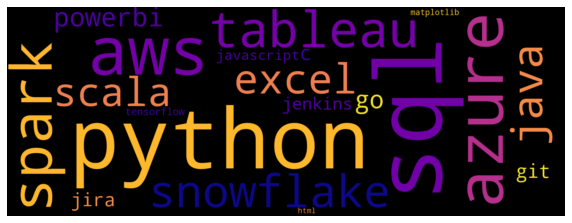

In [55]:
text = " ".join(flat_list)
analyst_word_cloud = WordCloud(
    background_color='white',
    colormap="Dark2",
    collocations=False).generate(text)

analyst_word_cloud = WordCloud(
                min_font_size=20,
                height=600,
                width=1600,
                background_color='black',
                contour_color='black',
                colormap='plasma', 
                repeat=False, 
                collocations=False).generate(text)

plt.figure(figsize=[10, 10])
plt.imshow(analyst_word_cloud, interpolation="bilinear")
plt.axis('off')
# plt.savefig("output/images/word_cloud.png", bbox_inches="tight")
plt.show();

### Bar Chart

In [56]:
all_percentage = pd.DataFrame(all_data_clean.mean(numeric_only=True) * 100, columns=['percentage'])
all_percentage = all_percentage.sort_values(by='percentage', ascending=False)

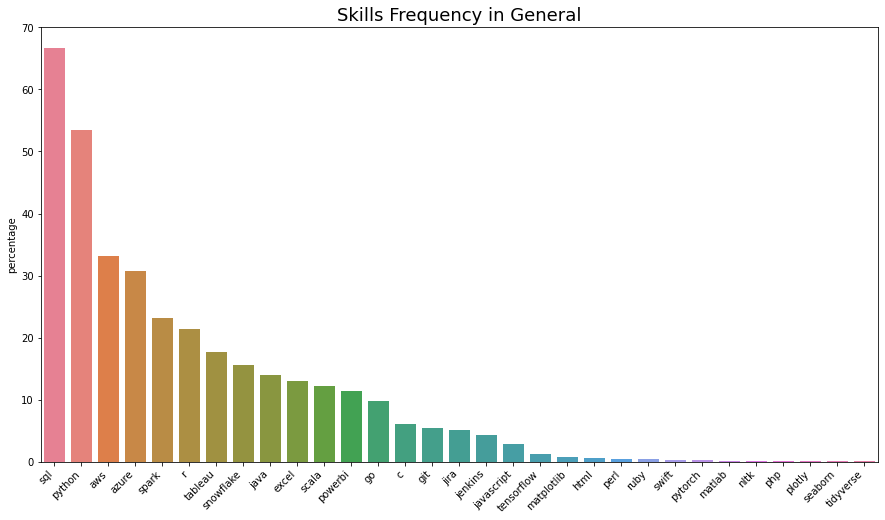

In [57]:
plt.subplots(figsize=(15, 8))
sns.barplot(data=all_percentage, x=all_percentage.index, y='percentage', palette='husl')
plt.title('Skills Frequency in General', fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.savefig('output/images/skills_freq_general.png', bbox_inches="tight");

### Correlation

In [58]:
high_freq_skills_list = all_percentage[all_percentage['percentage'] >= 5].index

In [59]:
high_freq_skills = all_data_clean[high_freq_skills_list]
high_freq_skills

,sql,python,aws,azure,spark,...,powerbi,go,c,git,jira
0,0,0,0,0,0,...,0,0,0,0,0
1,0,0,0,0,0,...,0,0,0,0,0
2,1,1,0,0,0,...,0,0,0,0,0
3,1,1,0,0,0,...,1,1,0,0,0
4,1,1,0,1,0,...,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
777,0,1,1,0,1,...,0,0,0,0,0
778,0,0,0,0,0,...,0,0,1,0,0
779,1,1,0,0,0,...,0,0,0,0,0
780,1,1,0,0,0,...,0,0,0,0,0


In [60]:
test = high_freq_skills[['sql', 'python']].corr(method='pearson')
test

,sql,python
sql,1.000000,0.277409
python,0.277409,1.000000


In [61]:
high_freq_skills_corr = high_freq_skills.corr()

In [62]:
high_freq_skills_corr

,sql,python,aws,azure,spark,...,powerbi,go,c,git,jira
sql,1.000000,0.277409,0.000649,0.069421,0.078383,...,0.116163,0.011625,0.064260,0.051164,0.065293
python,0.277409,1.000000,0.204581,0.015083,0.275053,...,0.011520,0.072493,0.128112,0.078897,0.053750
aws,0.000649,0.204581,1.000000,0.209204,0.393308,...,0.030141,0.016774,-0.006476,0.044796,0.021607
azure,0.069421,0.015083,0.209204,1.000000,0.147586,...,0.102020,-0.003040,0.146701,0.180052,-0.091575
spark,0.078383,0.275053,0.393308,0.147586,1.000000,...,0.013368,0.014424,0.090846,0.213440,0.120308
...,...,...,...,...,...,...,...,...,...,...,...
powerbi,0.116163,0.011520,0.030141,0.102020,0.013368,...,1.000000,0.018357,-0.039797,0.072531,-0.028374
go,0.011625,0.072493,0.016774,-0.003040,0.014424,...,0.018357,1.000000,-0.028477,-0.041267,0.021801
c,0.064260,0.128112,-0.006476,0.146701,0.090846,...,-0.039797,-0.028477,1.000000,0.127822,-0.058713
git,0.051164,0.078897,0.044796,0.180052,0.213440,...,0.072531,-0.041267,0.127822,1.000000,0.122238


In [63]:
high_freq_skills_corr.to_excel("output/data/Skills_correlation.xlsx", sheet_name="Skills Correlation", index=True)

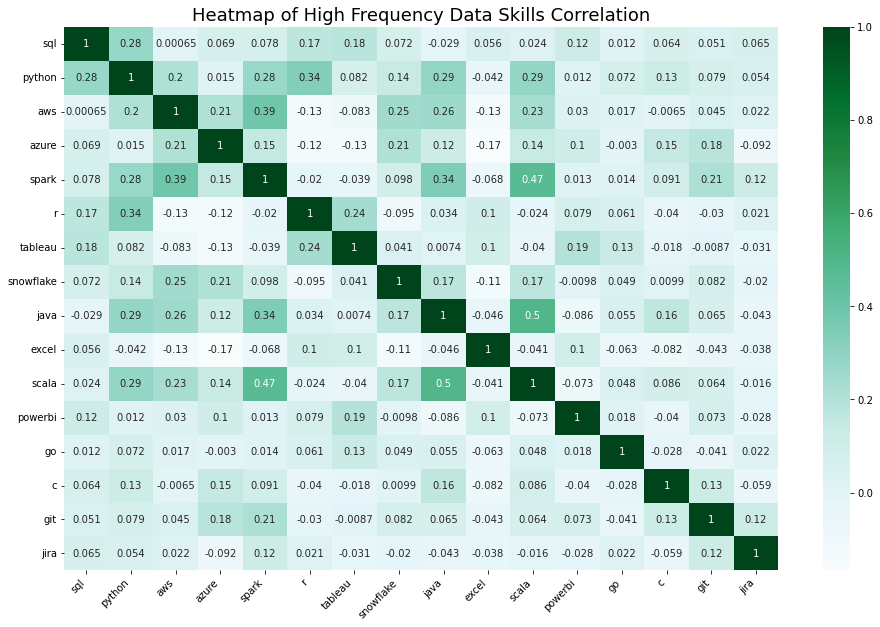

In [64]:
plt.subplots(figsize=(16,10))
plt.title('Heatmap of High Frequency Data Skills Correlation', fontsize=18)
sns.heatmap(high_freq_skills_corr, annot=True, cmap='BuGn');


plt.xticks(rotation=45, ha='right')
plt.savefig('output/images/skills_correlation.png', bbox_inches="tight");

## 4.2 Data Skills by Occupations

In [65]:
def get_skill_percentage(df):
    df_skill_percentage = df.mean(numeric_only=True).to_frame().reset_index()
    df_skill_percentage.columns = ['skill', 'percentage']
    df_skill_percentage = df_skill_percentage.sort_values(by='percentage', ascending=False)
    df_skill_percentage['percentage'] = df_skill_percentage['percentage'] * 100
    return df_skill_percentage

In [66]:
analyst_skill_percentage = get_skill_percentage(analyst_data_clean)
engineer_skill_percentage = get_skill_percentage(engineer_data_clean)
scientist_skill_percentage = get_skill_percentage(scientist_data_clean)

In [67]:
scientist_skill_percentage

,skill,percentage
17,python,84.259259
24,sql,68.518519
19,r,57.407407
25,tableau,24.074074
1,azure,18.518519
...,...,...
12,nltk,0.925926
10,matlab,0.925926
8,javascript,0.925926
6,html,0.925926


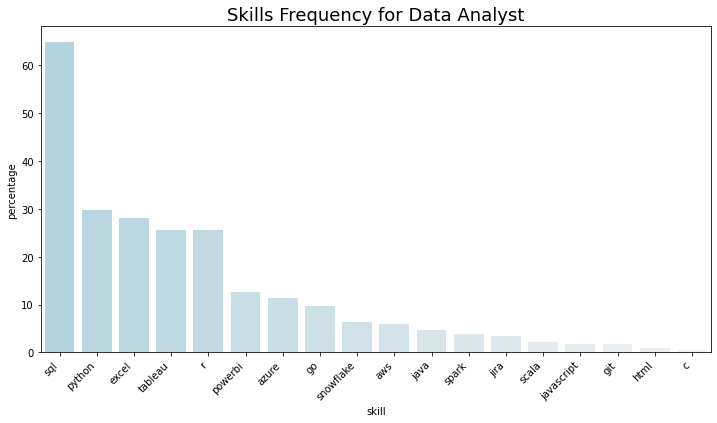

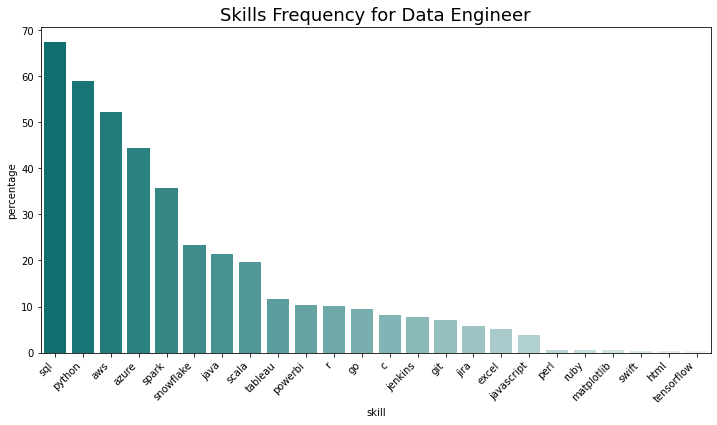

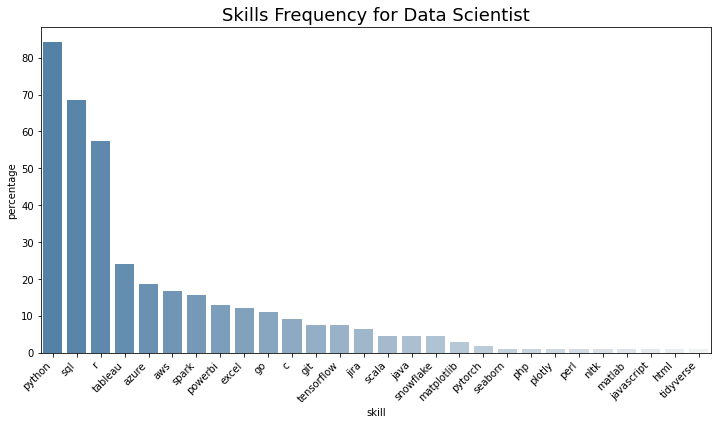

In [68]:
plt.subplots(figsize=(12, 6))
sns.barplot(data=analyst_skill_percentage, x='skill', y=analyst_skill_percentage.percentage, 
            palette=sns.light_palette("lightblue", len(analyst_skill_percentage), reverse=True))
plt.title('Skills Frequency for Data Analyst', fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.savefig('output/images/skills_freq_analyst.png', bbox_inches="tight")

plt.subplots(figsize=(12, 6))
sns.barplot(data=engineer_skill_percentage, x='skill', y=engineer_skill_percentage.percentage,
           palette=sns.light_palette("teal", len(engineer_skill_percentage), reverse=True))
plt.title('Skills Frequency for Data Engineer', fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.savefig('output/images/skills_freq_engineer.png', bbox_inches="tight");

plt.subplots(figsize=(12, 6))
sns.barplot(data=scientist_skill_percentage, x='skill', y=scientist_skill_percentage.percentage,
           palette=sns.light_palette("steelblue", len(scientist_skill_percentage), reverse=True))
plt.title('Skills Frequency for Data Scientist', fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.savefig('output/images/skills_freq_scientist.png', bbox_inches="tight");

plt.show();

In [69]:
skill_by_job = analyst_skill_percentage.merge(engineer_skill_percentage, how='outer', on='skill').merge(scientist_skill_percentage, how='outer', on='skill').fillna(0)
skill_by_job.columns = ['skill', 'analyst', 'engineer', 'scientist']
skill_by_job = skill_by_job[(skill_by_job['analyst'] >= 5) | (skill_by_job['engineer'] >= 5)  | (skill_by_job['scientist'] >= 5)].reset_index(drop=True)

In [70]:
skill_by_job

,skill,analyst,engineer,scientist
0,sql,64.853556,67.356322,68.518519
1,python,29.707113,58.850575,84.259259
2,excel,28.033473,5.057471,12.037037
3,tableau,25.523013,11.724138,24.074074
4,r,25.523013,10.114943,57.407407
...,...,...,...,...
13,scala,2.092050,19.770115,4.629630
14,git,1.673640,7.126437,7.407407
15,c,0.418410,8.275862,9.259259
16,jenkins,0.000000,7.816092,0.000000


In [71]:
skill_by_job_long = pd.melt(skill_by_job, id_vars='skill', var_name='job', value_name = 'percentage')
skill_by_job_long

,skill,job,percentage
0,sql,analyst,64.853556
1,python,analyst,29.707113
2,excel,analyst,28.033473
3,tableau,analyst,25.523013
4,r,analyst,25.523013
...,...,...,...
49,scala,scientist,4.629630
50,git,scientist,7.407407
51,c,scientist,9.259259
52,jenkins,scientist,0.000000


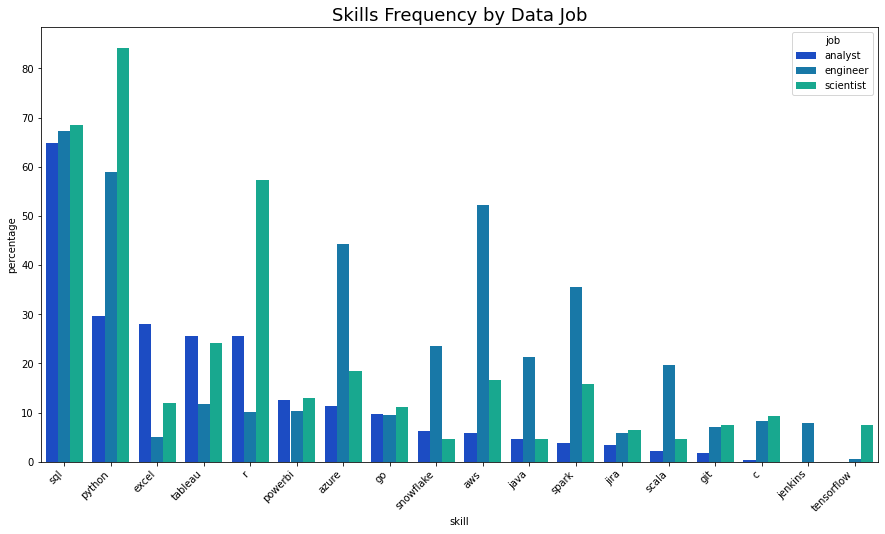

In [72]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(data=skill_by_job_long, ax=ax, x='skill', y='percentage', hue='job', palette='winter')
plt.title('Skills Frequency by Data Job', fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.savefig('output/images/skills_freq_by_job.png', bbox_inches="tight");

In [73]:
skill_by_job.to_excel("output/data/Skill_by_occupations.xlsx", sheet_name="Skill by Occupations", index=False)

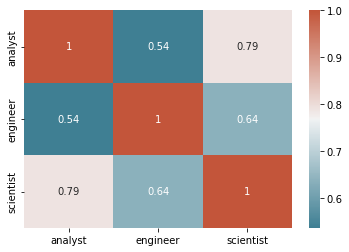

In [75]:
sns.heatmap(corr, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True));

In [96]:
%history

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_columns', 10)  # or 1000
pd.set_option('display.max_rows', 10)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199
pd.options.mode.chained_assignment = None  # default='warn'
# Saving chart with white background
plt.rcParams['savefig.facecolor'] = 'white'
analyst_data = pd.read_excel('input/LinkedIn-Job-Data-Analyst-Sep-13-2022_1923.xlsx')
engineer_data = pd.read_excel('input/LinkedIn-Job-Data-Engineer-Sep-13-2022_1808.xlsx')
scientist_data = pd.read_excel('input/LinkedIn-Job-Data-Scientist-Sep-13-2022_1728.xlsx')
analyst_data.head()
analyst_data.describe()
analyst_data_clean = analyst_data.copy()
analyst_data_clean = analyst_data_clean.drop(['Date', 'Link'], axis='columns')
analyst_data_clean = analyst_data_clean.drop(analyst_data_clean[analyst_data_clean.Description=

## 4.3 Data Skills by Levels

In [76]:
level_distribution = all_data_clean['Seniority level'].value_counts(normalize=True) * 100

In [77]:
level_distribution

Mid-Senior level    36.828645
Associate           24.424552
Entry level         22.378517
Not Applicable      15.856777
Director             0.255754
Internship           0.127877
                     0.127877
Name: Seniority level, dtype: float64

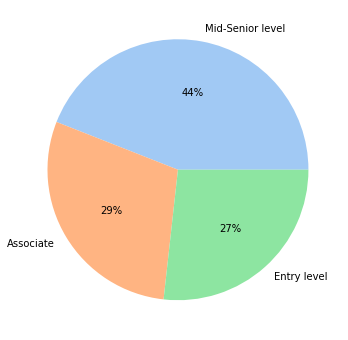

In [78]:
colors = sns.color_palette('pastel', as_cmap=True)

distribution_pie = level_distribution[level_distribution.values >= 20]

plt.subplots(figsize=(12,6))
plt.pie(distribution_pie, labels=distribution_pie.index, colors=colors, autopct='%.0f%%');

In [79]:
skill_by_level = all_data_clean.groupby("Seniority level").mean() * 100
skill_by_level = skill_by_level.transpose()

skill_by_level.columns.name=''

# Only consider 3 major level
level_list = ['Entry level', 'Associate', 'Mid-Senior level']
skill_by_level = skill_by_level[level_list]

skill_by_level.reset_index(inplace=True)
skill_by_level = skill_by_level.rename(columns = {'index':'skill'})

In [80]:
skill_by_level = skill_by_level[(skill_by_level['Entry level'] >= 5) | (skill_by_level['Associate'] >= 5)  | (skill_by_level['Mid-Senior level'] >= 5)].reset_index(drop=True)

In [82]:
skill_by_level_long = pd.melt(skill_by_level, id_vars=['skill'], var_name=['level'], value_name='percentage')
skill_by_level_long = skill_by_level_long.sort_values(by='percentage', ascending=False)
skill_by_level_long = skill_by_level_long.reset_index(drop=True)

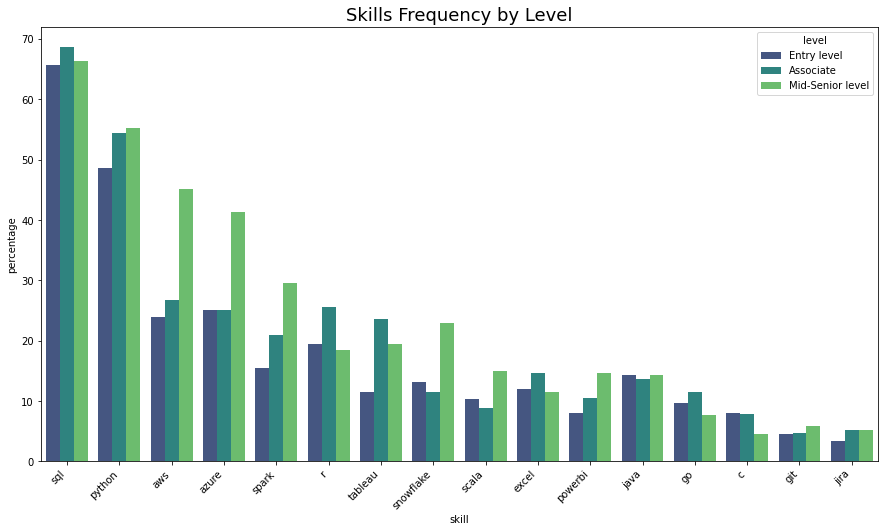

In [84]:
plt.subplots(figsize=(15, 8))
sns.barplot(data=skill_by_level_long, x='skill', y='percentage', hue='level', 
            hue_order=['Entry level', 'Associate', 'Mid-Senior level'], palette='viridis')

plt.title('Skills Frequency by Level', fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.savefig('output/images/skills_freq_by_level.png', bbox_inches="tight");

In [85]:
skill_by_level.to_excel('output/data/Skill_by_level.xlsx', sheet_name="Skill by Level", index=False)

## 4.4 Data Skill by State

In [86]:
states= ['New South Wales', 'Victoria', 'Queensland', 'Western Australia', 'South Australia', 'Australian Capital Territory']

In [87]:
num_jobs_by_state = all_data_clean.State.value_counts()
num_jobs_by_state = num_jobs_by_state[num_jobs_by_state.index.isin(states)]

In [88]:
num_jobs_by_state

New South Wales                 324
Victoria                        260
Queensland                       61
Western Australia                43
South Australia                  25
Australian Capital Territory     19
Name: State, dtype: int64

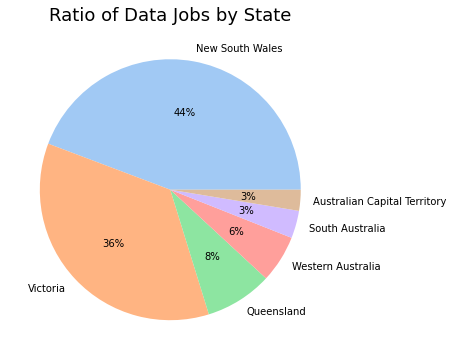

In [89]:
colors = sns.color_palette('pastel', as_cmap=True)

plt.subplots(figsize=(12,6))
plt.pie(num_jobs_by_state, labels=num_jobs_by_state.index, colors=colors, autopct='%.0f%%')
plt.title('Ratio of Data Jobs by State', fontsize=18)
plt.savefig("output/images/ratio_jobs_by_state.png", bbox_inches="tight");

In [90]:
skill_by_state = all_data_clean.groupby("State").mean() * 100
skill_by_state = skill_by_state.transpose()
skill_by_state.columns.name=''

# Only keep those in state list
skill_by_state = skill_by_state[states]

# Rename skill column
skill_by_state.reset_index(inplace=True)
skill_by_state = skill_by_state.rename(columns = {'index':'skill'})

In [91]:
# Only keep major skills
skill_by_state = skill_by_state[(skill_by_state['New South Wales'] >= 10) | (skill_by_state['Victoria'] >= 10)  | (skill_by_state['Queensland'] >= 10) | (skill_by_state['Western Australia'] >= 10)].reset_index(drop=True)

In [93]:
skill_by_state_long = pd.melt(skill_by_state, id_vars=['skill'], var_name=['state'], value_name='percentage')
skill_by_state_long = skill_by_state_long.sort_values(by='percentage', ascending=False)
skill_by_state_long = skill_by_state_long.reset_index(drop=True)

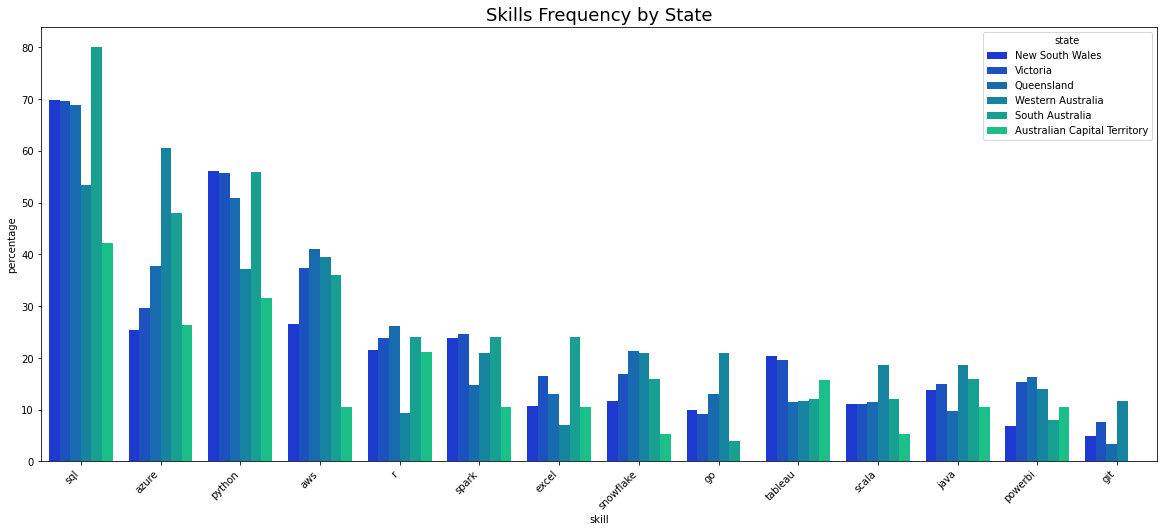

In [95]:
plt.subplots(figsize=(20, 8))
sns.barplot(data=skill_by_state_long, x='skill', y='percentage', hue='state', 
            hue_order=['New South Wales', 'Victoria', 'Queensland', 'Western Australia', 'South Australia', 'Australian Capital Territory'], 
            palette='winter')

plt.title('Skills Frequency by State', fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.savefig('output/images/skills_freq_by_state.png', bbox_inches="tight");